Authors:

Shadi Farokhghate

Hridoy Pal

Md Jamil Ahmed 

School of Computer Science, University of Windsor

# Question 1



**1.1 SGD minibatch on MNIST dataset**

In [ ]:
#importing necessary packages and libraries
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}')

2.15.0
11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


In this section, we will be implementing a shallow neural network for multi-class classification. For this network, we will be utilizing the architecture detailed in https://github.com/diegoinacio/machine-learning-notebooks/blob/master/Deep-Learning-Models/sourceimages/MCLR.png. The network will be implemented using TensorFlow with the following model definition:

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='softmax')
])
```

The results will be visualized using a learning rate of 0.1, a batch size of 64, and 10 epochs to ensure efficient computation

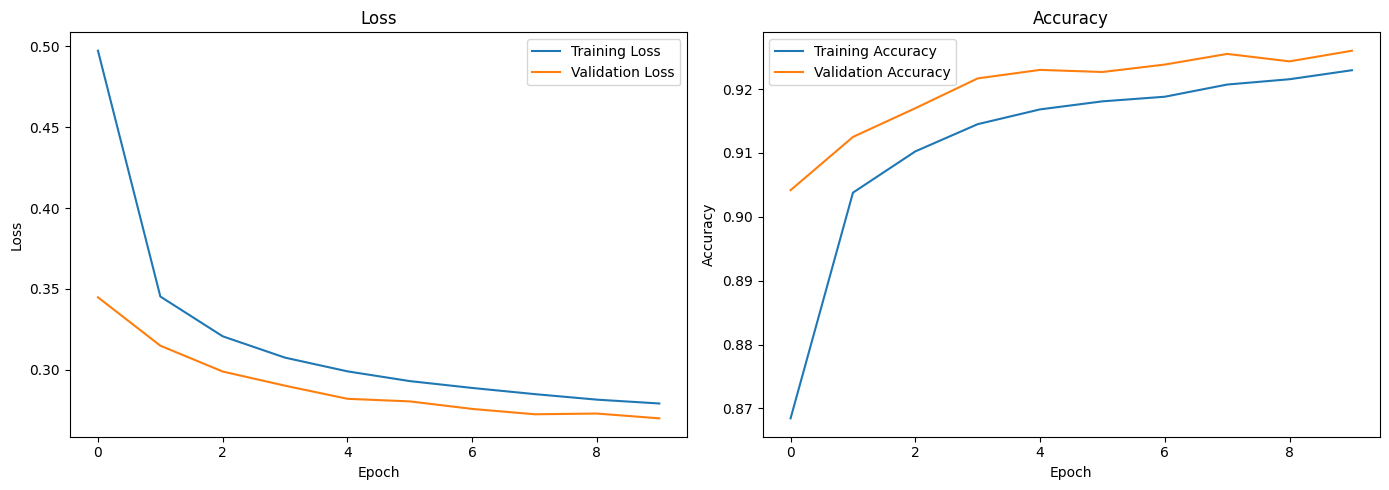

Validation accuracy: 0.9260
Test accuracy: 0.9228


In [ ]:
#data preprocessing
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


#creating validation dataset
validation_split = 0.1
validation_size = int(x_train.shape[0] * validation_split)
x_val = x_train[:validation_size]
y_val = y_train[:validation_size]
x_train = x_train[validation_size:]
y_train = y_train[validation_size:]


#model define
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='softmax')
])

#compile the model with SGD
model.compile(optimizer=tf.keras.optimizers.SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

#model training
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose = 0)



fig, axs = plt.subplots(1, 2, figsize=(14, 5))

#plot the training and validation loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss')
axs[0].legend()

#plot the training and validation accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy')
axs[1].legend()

#display the plots
plt.tight_layout()
plt.show()


print(f"Validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
_, test_accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f"Test accuracy: {test_accuracy:.4f}")

**Result Analysis**

After 10 epochs, the validation accuracy is approximately 0.93, and the test accuracy is also around the same level. This is very impressive for a simple logistic regression classifier.

**1.1.1 Investigating different hyperparameters set for SGD minibatch.**

Learning rate: 0.001, Batch size: 64, Validation accuracy: 0.8988
Learning rate: 0.001, Batch size: 128, Validation accuracy: 0.8845
Learning rate: 0.001, Batch size: 256, Validation accuracy: 0.8628
Learning rate: 0.01, Batch size: 64, Validation accuracy: 0.9248
Learning rate: 0.01, Batch size: 128, Validation accuracy: 0.9177
Learning rate: 0.01, Batch size: 256, Validation accuracy: 0.9092
Learning rate: 0.1, Batch size: 64, Validation accuracy: 0.9285
Learning rate: 0.1, Batch size: 128, Validation accuracy: 0.9292
Learning rate: 0.1, Batch size: 256, Validation accuracy: 0.9282


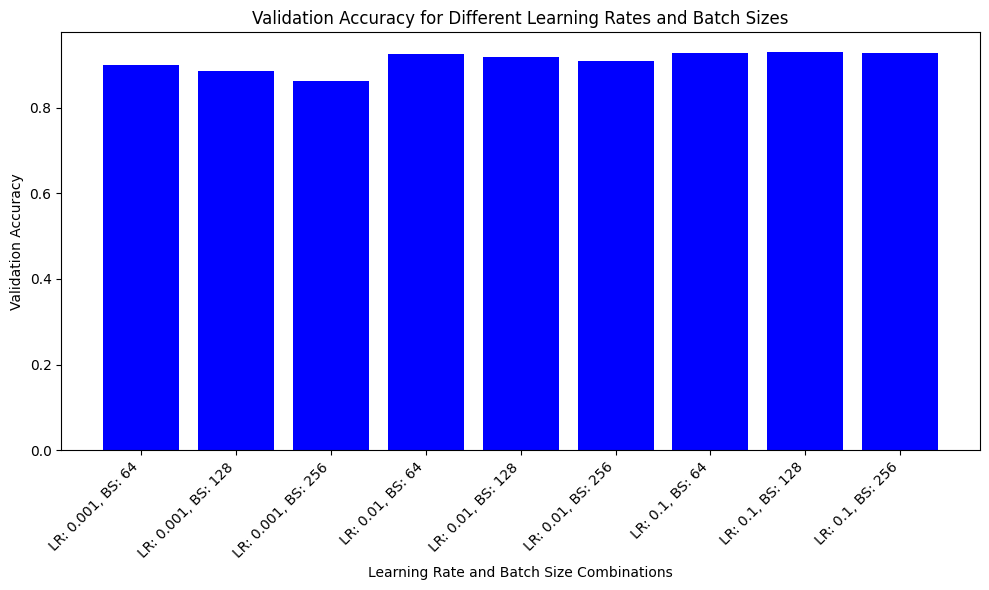

In [ ]:
def train_model(learning_rate, batch_size):

  #epoch is capped to 50 to reduce computation
  epochs = 50

  #creating the model
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='softmax')
  ])

  #compiling the model
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

  #model training
  history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose = 0)
  return history


#different set of hyperparameters
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [64, 128, 256]
num_initialization = 1

results = []

for learning_rate in learning_rates:
  for batch_size in batch_sizes:
    for i in range(num_initialization):
      history = train_model(learning_rate, batch_size)
      results.append((learning_rate, batch_size, history.history['val_accuracy'][-1]))

      print(f"Learning rate: {learning_rate}, Batch size: {batch_size}, Validation accuracy: {history.history['val_accuracy'][-1]:.4f}")


labels = [f"LR: {lr}, BS: {bs}" for lr, bs, _ in results]
accuracies = [acc for _, _, acc in results]

#plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Learning Rate and Batch Size Combinations')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Learning Rates and Batch Sizes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Result Analysis**

The findings indicate that the learning rate has a greater impact on validation accuracy than batch sizes. A learning rate of 0.1 proves to be effective across various batch sizes. Higher learning rates (0.1 and 0.01) result in improved validation accuracy, while validation accuracy decreases as batch size increases for lower learning rates (0.001 and 0.01).

Optimal Hyperparameters:
- Best Accuracy: 0.9292
- Configuration: Learning rate 0.1, Batch size 128




**1.2 Implementing different optimizers**

Optimizer: SGD, Validation accuracy: 0.9290, Test accuracy: 0.9243
Optimizer: SGD Momentum, Validation accuracy: 0.9282, Test accuracy: 0.9260
Optimizer: RMSprop, Validation accuracy: 0.8925, Test accuracy: 0.8899
Optimizer: Adam, Validation accuracy: 0.8833, Test accuracy: 0.8826
Optimizer: Adagrad, Validation accuracy: 0.9295, Test accuracy: 0.9274


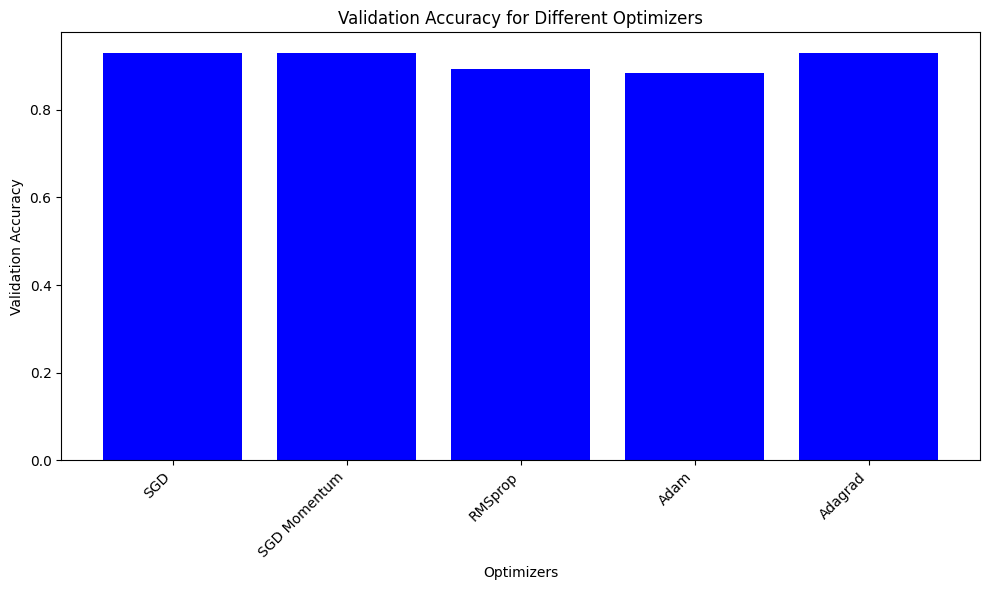

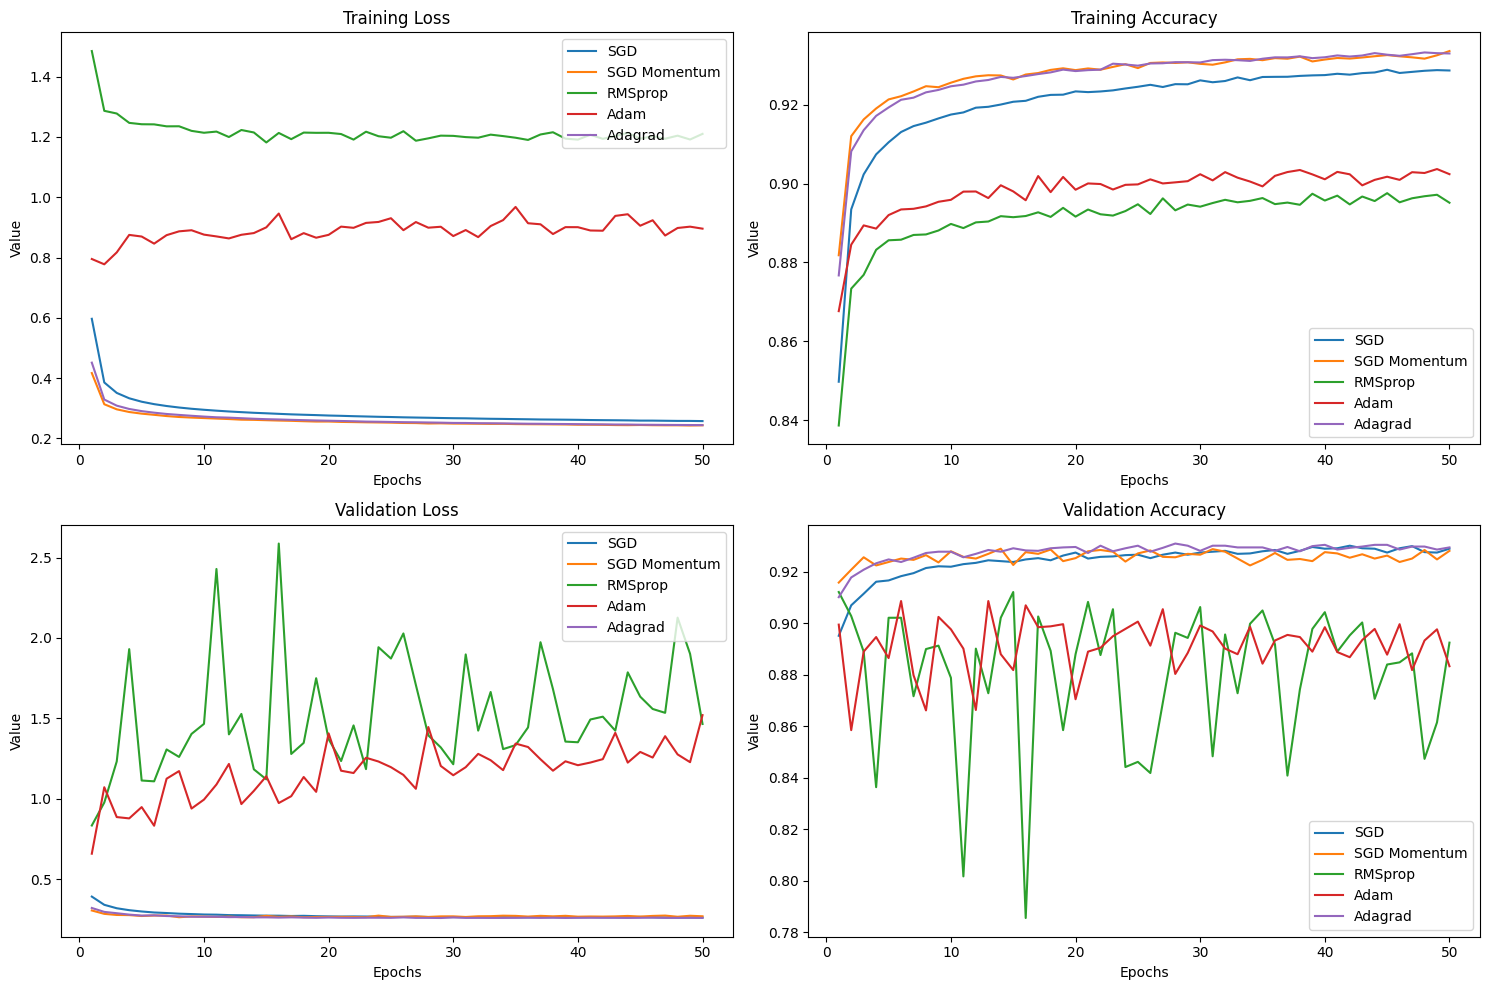

In [ ]:
#list of optimizers with their names
learning_rate = 0.1
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate),
    'SGD Momentum': tf.keras.optimizers.SGD(learning_rate, momentum=0.8),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate),
    'Adam': tf.keras.optimizers.Adam(learning_rate),
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate)
}

results = {}
epochs = 50
batch_size = 128

#loop through the optimizers, train the model, and collect the results
for optimizer_name, optimizer in optimizers.items():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    results[optimizer_name] = history.history
    _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Optimizer: {optimizer_name}, Validation accuracy: {val_accuracy:.4f}, Test accuracy: {test_accuracy:.4f}")

#data for plotting
labels = list(results.keys())  # Extract the keys (optimizer names) directly
accuracies = [history['val_accuracy'][-1] for history in results.values()]

#plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Optimizers')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Optimizers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for optimizer_name, history in results.items():
    epochs_range = range(1, epochs + 1)
    axs[0, 0].plot(epochs_range, history['loss'], label=optimizer_name)
    axs[0, 1].plot(epochs_range, history['accuracy'], label=optimizer_name)
    axs[1, 0].plot(epochs_range, history['val_loss'], label=optimizer_name)
    axs[1, 1].plot(epochs_range, history['val_accuracy'], label=optimizer_name)

#titles and legends
axs[0, 0].set_title('Training Loss')
axs[0, 1].set_title('Training Accuracy')
axs[1, 0].set_title('Validation Loss')
axs[1, 1].set_title('Validation Accuracy')

for ax in axs.flat:
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()

**Result Analysis**


From the above plots, it is evident that RMSprop and Adam had the highest training loss. In terms of validation accuracy, after 50 epochs, Adagrad performed exceptionally well, with the highest validation and test accuracy of 0.9295 and 0.9274, respectively. Conversely, Adam exhibited the lowest validation accuracy and test accuracy, at 0.8833 and 0.8826. SGD minibatch performed almost the same as Adagrad.

# Question 2

We will use Pytorch for the following set of experiments.  
This section downloads and preprocesses the MNIST dataset, splits the training data into training and validation sets, and creates data loaders for each set.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

# Download and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# DataLoader with batch size 128
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 35544456.74it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1098477.40it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9539818.47it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3537702.65it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Build the Neural Network with L2 Regularization  
The neural network for multiclass logistic regression consists of an input layer, one hidden layer, and an output layer. We add ReLU as our non-linear activation function. We will add L2 regularization to the loss function to penalize large weights during the training, thereby reducing overfitting.

In [ ]:
# Define the Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, num_classes=10):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = x.view(-1, 28*28)  # Flatten the input
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out


### Define the Training Loop with L2 Regularization  
We will implement the training loop where we add the L2 regularization term to the loss function.

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, lambda_reg, num_epochs=10):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Add L2 regularization term
            l2_reg = sum(torch.norm(param) for param in model.parameters())
            loss += lambda_reg * l2_reg

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        # Compute training loss and accuracy
        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)
        train_acc = 100 * correct_train / total_train
        train_accuracies.append(train_acc)

        # Compute validation loss and accuracy
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                l2_reg = sum(torch.norm(param) for param in model.parameters())
                loss += lambda_reg * l2_reg
                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        val_acc = 100 * correct_val / total_val
        val_accuracies.append(val_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')

    return model, train_losses, val_losses, train_accuracies, val_accuracies


### The Hyperparameter Section

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1

# Hyperparameter tuning for lambda_reg
lambda_values = [0.001, 0.01, 0.1, 1.0, 10.0]
best_val_acc = 0
best_lambda_reg = None
for lambda_reg in lambda_values:
    model = NeuralNet()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    _, _, _, _, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, lambda_reg, num_epochs=10)
    avg_val_acc = sum(val_accuracies[-3:]) / 3  # Average of last 3 epochs
    print(f'Lambda: {lambda_reg}, Average Validation Accuracy: {avg_val_acc:.2f}%')
    if avg_val_acc > best_val_acc:
        best_val_acc = avg_val_acc
        best_lambda_reg = lambda_reg

print(f'Best Lambda: {best_lambda_reg}, Best Validation Accuracy: {best_val_acc:.2f}%')


Epoch [1/10], Train Loss: 0.5496, Val Loss: 0.2947, Train Acc: 83.24%, Val Acc: 91.97%
Epoch [2/10], Train Loss: 0.2714, Val Loss: 0.2557, Train Acc: 92.24%, Val Acc: 92.52%
Epoch [3/10], Train Loss: 0.2116, Val Loss: 0.1945, Train Acc: 94.14%, Val Acc: 94.82%
Epoch [4/10], Train Loss: 0.1755, Val Loss: 0.1805, Train Acc: 95.21%, Val Acc: 95.13%
Epoch [5/10], Train Loss: 0.1524, Val Loss: 0.1598, Train Acc: 96.00%, Val Acc: 95.87%
Epoch [6/10], Train Loss: 0.1355, Val Loss: 0.1429, Train Acc: 96.44%, Val Acc: 96.28%
Epoch [7/10], Train Loss: 0.1229, Val Loss: 0.1330, Train Acc: 96.89%, Val Acc: 96.63%
Epoch [8/10], Train Loss: 0.1123, Val Loss: 0.1293, Train Acc: 97.13%, Val Acc: 96.65%
Epoch [9/10], Train Loss: 0.1037, Val Loss: 0.1414, Train Acc: 97.42%, Val Acc: 96.20%
Epoch [10/10], Train Loss: 0.0970, Val Loss: 0.1194, Train Acc: 97.63%, Val Acc: 97.08%
Lambda: 0.001, Average Validation Accuracy: 96.64%
Epoch [1/10], Train Loss: 0.6586, Val Loss: 0.4036, Train Acc: 82.57%, Val Acc

Here we will train two sets of models, first we train the SGD minibatch with L2 Regularization and with the best value of the lambda, which is **_best_lambda_reg_** variable. From the previous step we find that,  
Best Lambda: 0.001   
Best Validation Accuracy: 96.64%   
Then for comparison we again train the same model without the L2 Regularization

In [ ]:
best_lambda_reg

0.001

In [ ]:
model_reg = NeuralNet()
optimizer_reg = optim.SGD(model_reg.parameters(), lr=learning_rate)
model_reg, train_losses_reg, val_losses_reg, train_accuracies_reg, val_accuracies_reg = train_model(model_reg, train_loader, val_loader, criterion, optimizer_reg, best_lambda_reg)

# Train the final model without regularization
model_no_reg = NeuralNet()
optimizer_no_reg = optim.SGD(model_no_reg.parameters(), lr=learning_rate)
model_no_reg, train_losses_no_reg, val_losses_no_reg, train_accuracies_no_reg, val_accuracies_no_reg = train_model(model_no_reg, train_loader, val_loader, criterion, optimizer_no_reg, 0.0)

Epoch [1/10], Train Loss: 0.5463, Val Loss: 0.2999, Train Acc: 83.16%, Val Acc: 91.35%
Epoch [2/10], Train Loss: 0.2623, Val Loss: 0.2218, Train Acc: 92.59%, Val Acc: 93.89%
Epoch [3/10], Train Loss: 0.2061, Val Loss: 0.2041, Train Acc: 94.19%, Val Acc: 94.31%
Epoch [4/10], Train Loss: 0.1719, Val Loss: 0.1634, Train Acc: 95.33%, Val Acc: 95.74%
Epoch [5/10], Train Loss: 0.1511, Val Loss: 0.1557, Train Acc: 95.99%, Val Acc: 95.82%
Epoch [6/10], Train Loss: 0.1346, Val Loss: 0.1501, Train Acc: 96.51%, Val Acc: 96.07%
Epoch [7/10], Train Loss: 0.1213, Val Loss: 0.1346, Train Acc: 97.00%, Val Acc: 96.59%
Epoch [8/10], Train Loss: 0.1113, Val Loss: 0.1253, Train Acc: 97.21%, Val Acc: 96.93%
Epoch [9/10], Train Loss: 0.1029, Val Loss: 0.1228, Train Acc: 97.44%, Val Acc: 96.88%
Epoch [10/10], Train Loss: 0.0962, Val Loss: 0.1182, Train Acc: 97.70%, Val Acc: 97.21%
Epoch [1/10], Train Loss: 0.5310, Val Loss: 0.4197, Train Acc: 83.55%, Val Acc: 85.47%
Epoch [2/10], Train Loss: 0.2533, Val Loss

### Evaluation
This method accumulates the accuracy of the model given the appropriate data (train, validation or test data). We report the test acc of the two variations (L2 and non-L2 models)

In [ ]:
# Evaluate test accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Evaluate the models on test set
test_accuracy_reg = evaluate_model(model_reg, test_loader)
test_accuracy_no_reg = evaluate_model(model_no_reg, test_loader)
print(f'Test Accuracy with L2 Regularization: {test_accuracy_reg:.2f}%')
print(f'Test Accuracy without L2 Regularization: {test_accuracy_no_reg:.2f}%')


Test Accuracy with L2 Regularization: 96.98%
Test Accuracy without L2 Regularization: 96.93%


# Plot The Results

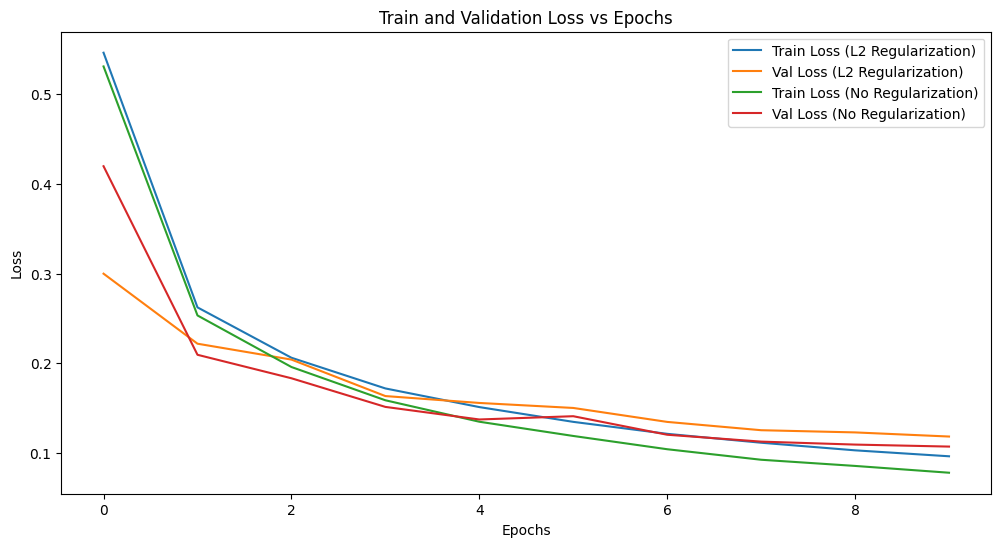

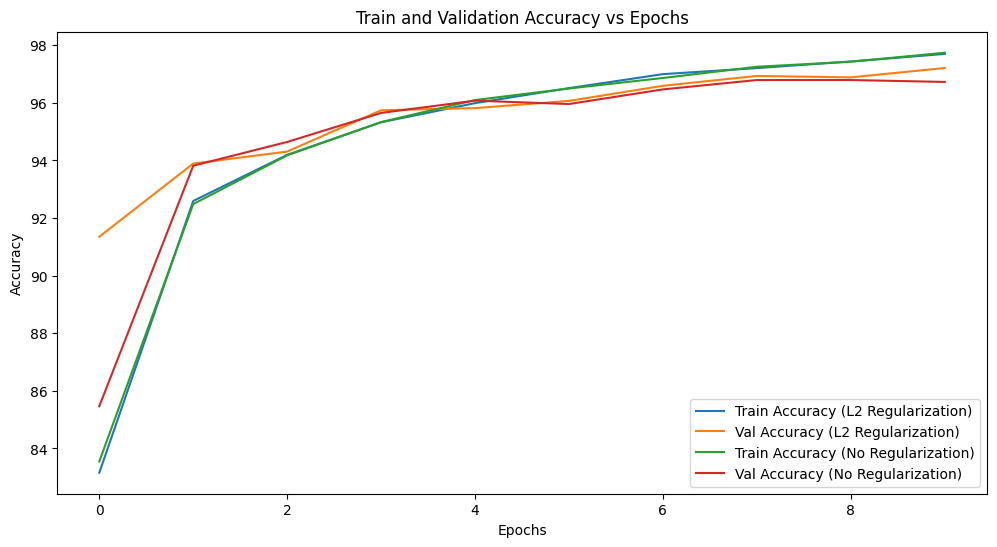

In [ ]:
# Plot train and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses_reg, label='Train Loss (L2 Regularization)')
plt.plot(val_losses_reg, label='Val Loss (L2 Regularization)')
plt.plot(train_losses_no_reg, label='Train Loss (No Regularization)')
plt.plot(val_losses_no_reg, label='Val Loss (No Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss vs Epochs')
plt.show()

# Plot train and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies_reg, label='Train Accuracy (L2 Regularization)')
plt.plot(val_accuracies_reg, label='Val Accuracy (L2 Regularization)')
plt.plot(train_accuracies_no_reg, label='Train Accuracy (No Regularization)')
plt.plot(val_accuracies_no_reg, label='Val Accuracy (No Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy vs Epochs')
plt.show()


### Inference

We see that for the hyperparameter tuned lambda value **0.001**, we are beating the best score of SGD minibatch non-L2 regularized model. We Finally get the test set accuracies as :   
  
Test Accuracy with L2 Regularization: 96.98%  
Test Accuracy without L2 Regularization: 96.93%
      
The provided plots allow us to draw some significant inferences about the impact of L2 regularization on the performance of our variations of the models. The plots show the progression of training and validation loss and accuracy over epochs for both the L2-regularized and non-regularized models. We observe that both models demonstrate similar trends in reducing loss and improving accuracy over epochs, which indicates effective learning. However, the L2-regularized model consistently maintains slightly lower validation loss and higher validation accuracy across epochs compared to the non-regularized model, suggesting that the regularization helps in achieving better generalization. The final test accuracies over only 10 epochs endorse that while the performance difference is marginal, the regularized model achieves a slight edge. This marginal improvement over such a small span of experiment easily dictates that L2 regularization, provides a more consistent and reliable generalization performance, likely due to its ability to prevent overfitting by penalizing excessively large weights.

# Question 3

Load and preprocess the MNIST dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


Define a simple CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(dropout_rate=0.0, l2_reg=0.0):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    return model

Train the model using basic minibatch SGD without any regularization

In [ ]:
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01)
model_no_reg = create_cnn_model()
model_no_reg.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history_no_reg = model_no_reg.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.4868 - accuracy: 0.8637 - val_loss: 0.1615 - val_accuracy: 0.9512
Epoch 2/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.1436 - accuracy: 0.9561 - val_loss: 0.0988 - val_accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0990 - accuracy: 0.9694 - val_loss: 0.0765 - val_accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0789 - accuracy: 0.9763 - val_loss: 0.0643 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0664 - accuracy: 0.9801 - val_loss: 0.0557 - val_accuracy: 0.9820
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.0494 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0513 - accuracy: 0.9845 - val_loss: 0.0499 -

Train the model using various regularization techniques

L2 Regularization

In [ ]:
model_l2_reg = create_cnn_model(l2_reg=0.01)
model_l2_reg.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history_l2_reg = model_l2_reg.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 2.6182 - accuracy: 0.8501 - val_loss: 1.6554 - val_accuracy: 0.9435
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 1.2552 - accuracy: 0.9487 - val_loss: 0.9181 - val_accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.7307 - accuracy: 0.9608 - val_loss: 0.5577 - val_accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.4835 - accuracy: 0.9656 - val_loss: 0.3990 - val_accuracy: 0.9683
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3639 - accuracy: 0.9674 - val_loss: 0.3103 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3046 - accuracy: 0.9692 - val_loss: 0.2770 - val_accuracy: 0.9712
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2741 - accuracy: 0.9697 - val_loss: 0.2576 -

Dropout

In [ ]:
model_dropout = create_cnn_model(dropout_rate=0.5)
model_dropout.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history_dropout = model_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.7123 - accuracy: 0.7771 - val_loss: 0.1985 - val_accuracy: 0.9425
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2421 - accuracy: 0.9277 - val_loss: 0.1112 - val_accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1747 - accuracy: 0.9473 - val_loss: 0.0824 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1421 - accuracy: 0.9575 - val_loss: 0.0703 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1236 - accuracy: 0.9629 - val_loss: 0.0593 - val_accuracy: 0.9802
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1101 - accuracy: 0.9665 - val_loss: 0.0611 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1008 - accuracy: 0.9687 - val_loss: 0.0524 -

Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

model_aug = create_cnn_model()
model_aug.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history_aug = model_aug.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.9659 - accuracy: 0.6893 - val_loss: 0.1562 - val_accuracy: 0.9570
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2619 - accuracy: 0.9201 - val_loss: 0.0926 - val_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1890 - accuracy: 0.9427 - val_loss: 0.0713 - val_accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1576 - accuracy: 0.9513 - val_loss: 0.0565 - val_accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1349 - accuracy: 0.9579 - val_loss: 0.0514 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1217 - accuracy: 0.9631 - val_loss: 0.0526 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1092 - accuracy: 0.9669 - val_loss: 0.0508 -

Compare the performance of the models

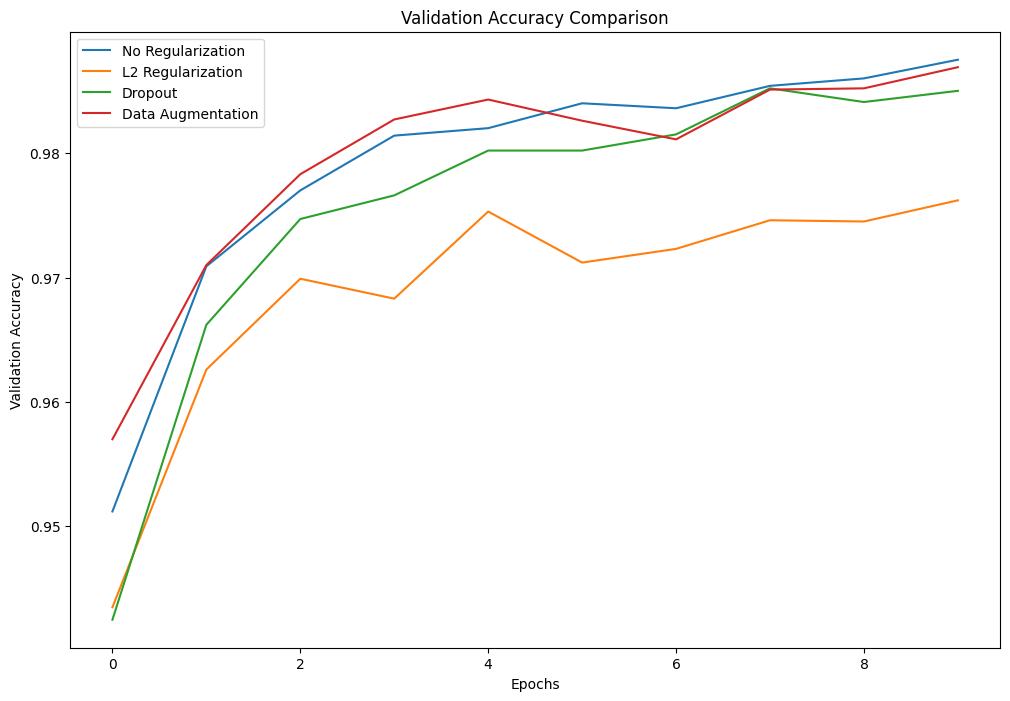

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, title):
    plt.figure(figsize=(12, 8))

    for name, history in histories:
        plt.plot(history.history['val_accuracy'], label=name)

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

histories = [
    ('No Regularization', history_no_reg),
    ('L2 Regularization', history_l2_reg),
    ('Dropout', history_dropout),
    ('Data Augmentation', history_aug)
]

plot_history(histories, 'Validation Accuracy Comparison')

**Result Analysis**

As shown in the above Figure, No Regularization achieves higher Validation Accuracy, while L2 Regularization has the lowest Validation Accuracy as the number of epochs increases.